In [1]:
import pandas as pd

## Lets first load all the data

In [2]:
aisles = pd.read_csv("./data/aisles.csv")

In [3]:
aisles

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation
...,...,...
129,130,hot cereal pancake mixes
130,131,dry pasta
131,132,beauty
132,133,muscles joints pain relief


This data tells us what items are in what aisle

In [4]:
departments = pd.read_csv("./data/departments.csv")

In [5]:
departments

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


this tells us the different departments

In [6]:
order_products_prior = pd.read_csv("./data/order_products__prior.csv")

In [7]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


gives information about which products were ordered and in which order they were added in the cart. It also tells us that if the product was reordered or not.

In [8]:
order_products_train = pd.read_csv("./data/order_products__train.csv")

gives information about which products were ordered and in which order they were added in the cart. It also tells us that if the product was reordered or not.

In [9]:
orders = pd.read_csv("./data/orders.csv")

In [10]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


 contains all the orders made by different users. 

In [11]:
products = pd.read_csv("./data/products.csv")

In [12]:
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


this gives us all the products sold in the store

In [13]:
len(products['product_name'].unique())

49688

### EDA on products data

In [17]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [22]:
orders_per_user = orders.groupby('user_id')['order_number'].max().reset_index(name='total_orders')

In [23]:
orders_per_user

,user_id,total_orders
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5
...,...,...
206204,206205,4
206205,206206,68
206206,206207,17
206207,206208,50


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

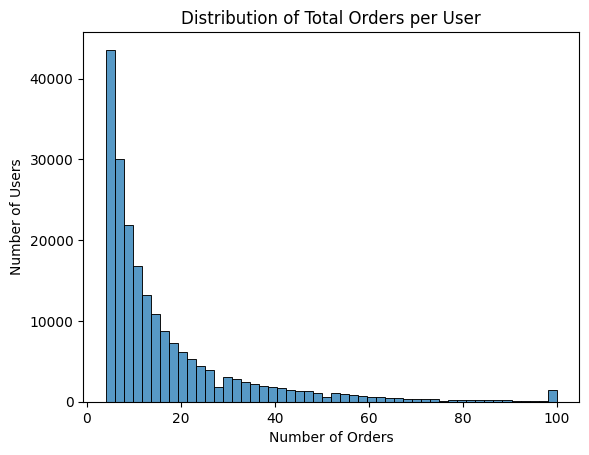

In [25]:
sns.histplot(orders_per_user['total_orders'], bins=50, kde=False)
plt.title("Distribution of Total Orders per User")
plt.xlabel("Number of Orders")
plt.ylabel("Number of Users")
plt.show()

<Axes: xlabel='total_orders', ylabel='Count'>

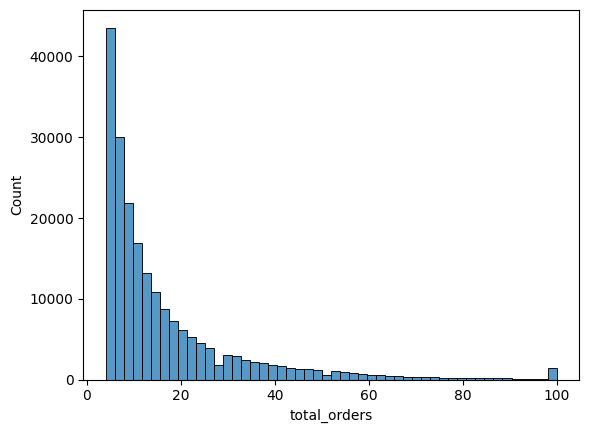

In [26]:
sns.histplot(orders_per_user['total_orders'], bins=50)

<Axes: xlabel='order_dow', ylabel='count'>

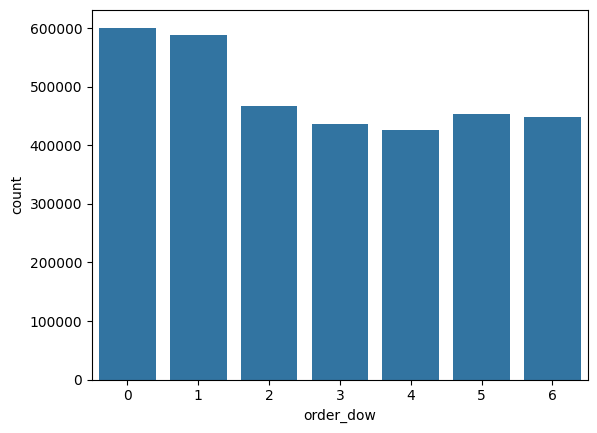

In [27]:
sns.countplot(x='order_dow', data=orders)

<Axes: xlabel='order_hour_of_day', ylabel='count'>

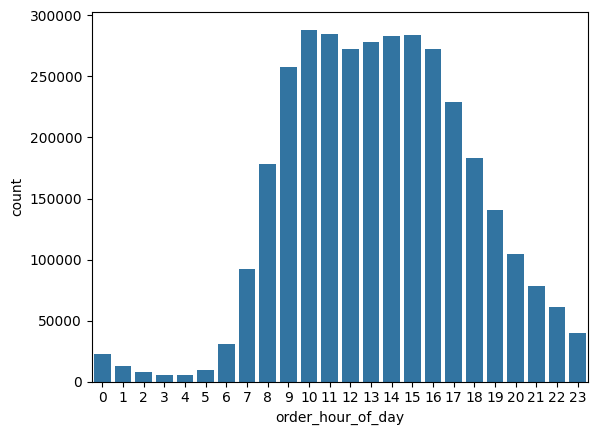

In [28]:
sns.countplot(x='order_hour_of_day', data=orders)

<Axes: xlabel='days_since_prior_order', ylabel='Count'>

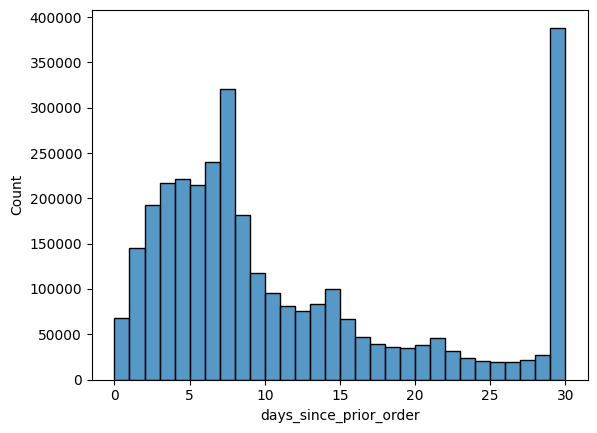

In [29]:
sns.histplot(orders['days_since_prior_order'].dropna(), bins=30)

### EDA on products data

In [32]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [35]:
top_products = order_products_prior['product_id'].value_counts().head(10).reset_index()

In [36]:
top_products

,product_id,count
0,24852,472565
1,13176,379450
2,21137,264683
3,21903,241921
4,47209,213584
5,47766,176815
6,47626,152657
7,16797,142951
8,26209,140627
9,27845,137905


In [37]:
# Rename columns properly
top_products.columns = ['product_id', 'order_count']

In [38]:
top_products_df = top_products.merge(products, on='product_id', how='left')

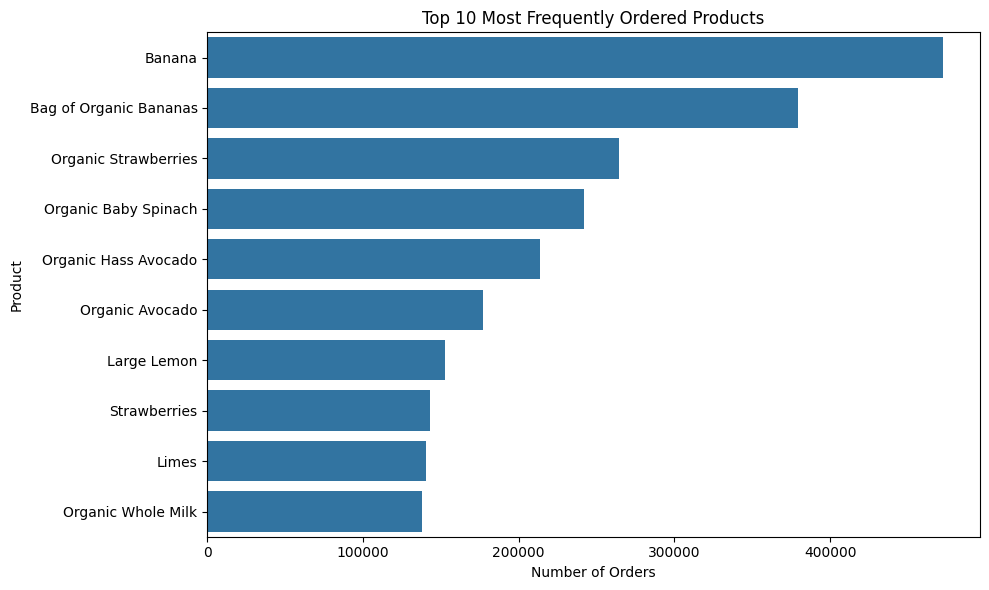

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_products_df, y='product_name', x='order_count')
plt.title("Top 10 Most Frequently Ordered Products")
plt.xlabel("Number of Orders")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [40]:
reorder_ratio = order_products_prior.groupby('product_id')['reordered'].mean().reset_index()

In [41]:
reorder_ratio

,product_id,reordered
0,1,0.613391
1,2,0.133333
2,3,0.732852
3,4,0.446809
4,5,0.600000
...,...,...
49672,49684,0.111111
49673,49685,0.122449
49674,49686,0.700000
49675,49687,0.461538


<Axes: xlabel='count', ylabel='department'>

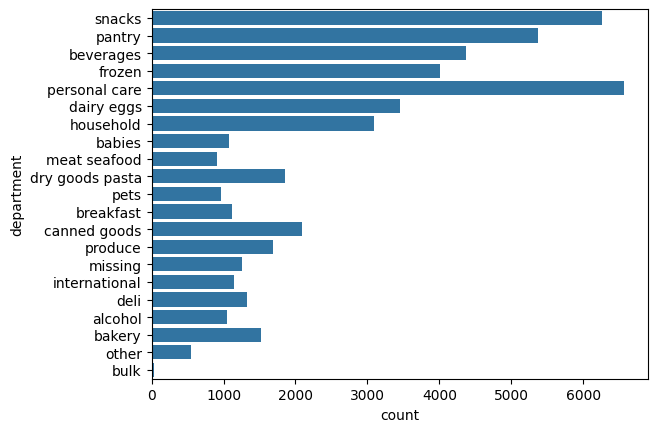

In [42]:
prod_dept = products.merge(departments, on='department_id')
sns.countplot(y='department', data=prod_dept)

In [43]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [44]:
order_products_prior['reordered'].mean()

np.float64(0.5896974667922161)

In [45]:
product_reorder_rate = order_products_prior.groupby('product_id')['reordered'].mean().reset_index()

In [47]:
product_reorder_rate = product_reorder_rate.merge(products, on='product_id')

In [48]:
product_reorder_rate

,product_id,reordered,product_name,aisle_id,department_id
0,1,0.613391,Chocolate Sandwich Cookies,61,19
1,2,0.133333,All-Seasons Salt,104,13
2,3,0.732852,Robust Golden Unsweetened Oolong Tea,94,7
3,4,0.446809,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,0.600000,Green Chile Anytime Sauce,5,13
...,...,...,...,...,...
49672,49684,0.111111,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49673,49685,0.122449,En Croute Roast Hazelnut Cranberry,42,1
49674,49686,0.700000,Artisan Baguette,112,3
49675,49687,0.461538,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [51]:
user_reorder_rate = order_products_prior.groupby('order_id')['reordered'].mean().reset_index()

In [52]:
user_reorder_rate = user_reorder_rate.merge(orders[['order_id', 'user_id']], on='order_id')
user_reorder_rate

,order_id,reordered,user_id
0,2,0.666667,202279
1,3,1.000000,205970
2,4,0.923077,178520
3,5,0.807692,156122
4,6,0.000000,22352
...,...,...,...
3214869,3421079,0.000000,108687
3214870,3421080,0.444444,52726
3214871,3421081,0.000000,117076
3214872,3421082,0.571429,175185


In [53]:
user_reorder_summary = user_reorder_rate.groupby('user_id')['reordered'].mean().reset_index()

In [54]:
user_reorder_summary

,user_id,reordered
0,1,0.705833
1,2,0.447961
2,3,0.658817
3,4,0.028571
4,5,0.377778
...,...,...
206204,206205,0.369048
206205,206206,0.570676
206206,206207,0.637144
206207,206208,0.700368


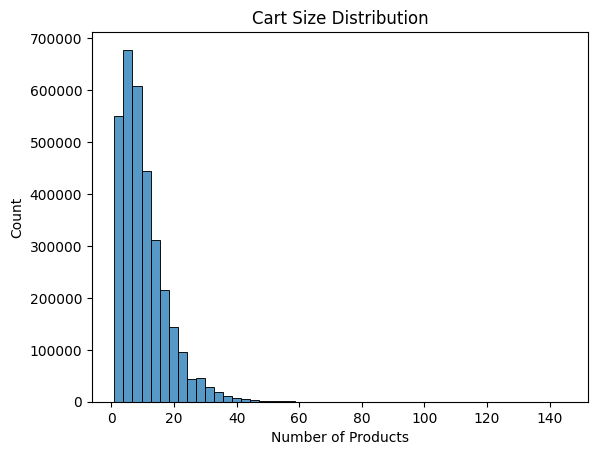

In [55]:
cart_size = order_products_prior.groupby('order_id').size()
sns.histplot(cart_size, bins=50)
plt.title("Cart Size Distribution")
plt.xlabel("Number of Products")
plt.show()

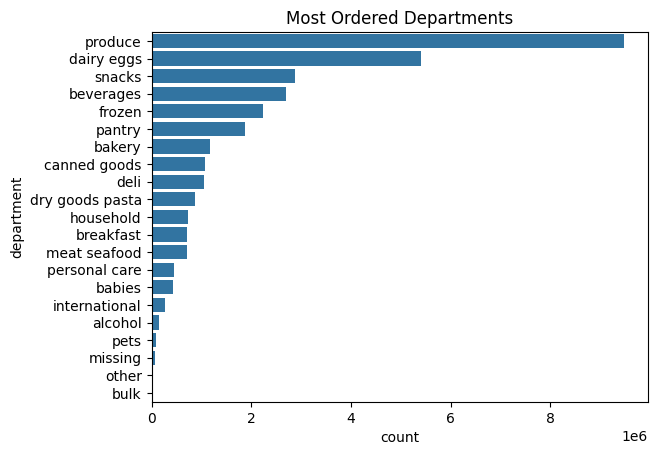

In [56]:
# Merge product meta
prod_meta = products.merge(aisles, on='aisle_id').merge(departments, on='department_id')

# Join with order data
merged = order_products_prior.merge(prod_meta, on='product_id')

# Most ordered departments
dept_counts = merged['department'].value_counts().reset_index()
dept_counts.columns = ['department', 'count']

sns.barplot(y='department', x='count', data=dept_counts)
plt.title("Most Ordered Departments")
plt.show()